# 190432J
# Pathirana R.P.U.A.


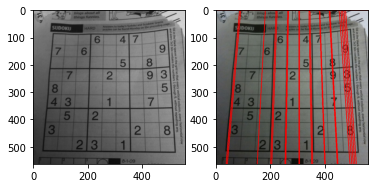

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
im = cv.imread(r'sudoku.png', cv.IMREAD_COLOR)
assert im is not None
gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
edged = cv.Canny(gray, 50,150, apertureSize=3)
lines = cv.HoughLines(edged,1,np.pi/180,200)



for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b= np.sin(theta)
    x0,y0 = a*rho , b*rho
    x1,y1 = int(x0+1000*(-b)),int (x0+1000*(a))
    x2,y2 = int(x0-1000*(-b)),int (x0-1000*(a))

    cv.line(im, (x1,y1), (x2,y2),(0,0,255),2 )
    
fig, ax =plt.subplots(1,2)
ax[0].imshow(cv.cvtColor(gray,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
plt.show()


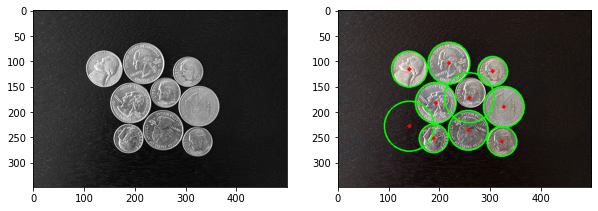

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('coins.jpg', cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50,
                            param1=150,param2=20,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(im,(i[0],i[1]),2,(0,0,255),3)


fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.show()

x=29.0,y=109.0,scale=1.0,orientation = 0.0,p1 = (4, 76), p2 = (54, 141)


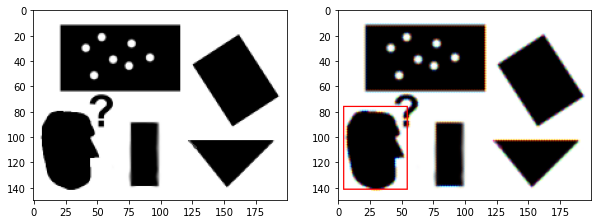

In [28]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread(r'pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
temp1 = cv.imread(r'templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

assert im is not None


im_edges = cv.Canny(im, 50, 250)
temp1_edges = cv.Canny(temp1, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(temp1_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions , votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHeight = temp1.shape[0] / 2. * scale
    halfWidth = temp1.shape[1] / 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x={},y={},scale={},orientation = {},p1 = {}, p2 = {}".format(x,y,scale,orientation,p1,p2) )
    cv.rectangle(out,p1,p2,(0,0,255))
    
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
plt.show()

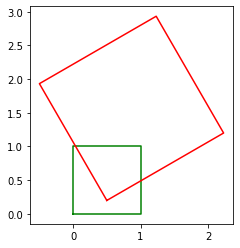

In [1]:
import matplotlib.pyplot as plt
import numpy as np

a,b,c,d = [0,0,1], [0,1,1], [1,1,1], [1,0,1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 2
tx, ty = 0.5, 0.2
H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx],[s* np.sin(theta), s* np.cos(theta), ty],[0,0,1]])
Y = H @ X


x = np.append(X[0, :], X[0,0])
y = np.append(X[1, :], X[1,0])
fig, ax = plt.subplots(1,1)
ax.plot(x,y, color = 'g')
ax.set_aspect('equal')


x = np.append(Y[0, :], Y[0,0])
y = np.append(Y[1, :], Y[1,0])
ax.plot(x,y, color = 'r')
ax.set_aspect('equal')

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread('img1.ppm',cv.IMREAD_ANYCOLOR)
im4 = cv.imread('img4.ppm',cv.IMREAD_ANYCOLOR)
